In [5]:
#Iris dataset for a simple softmax regression example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)
print(y)
df = pd.DataFrame(data=X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df.head()

(150, 4) (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


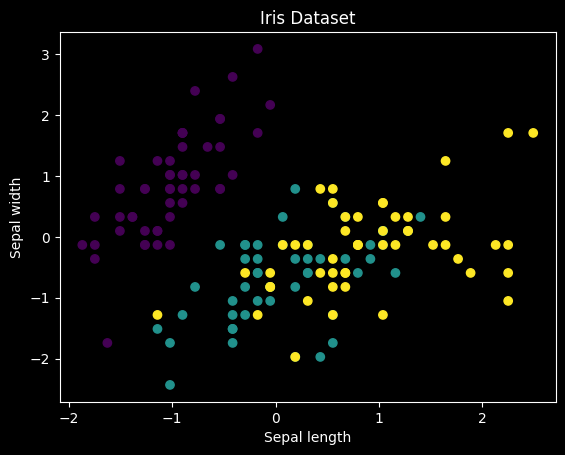

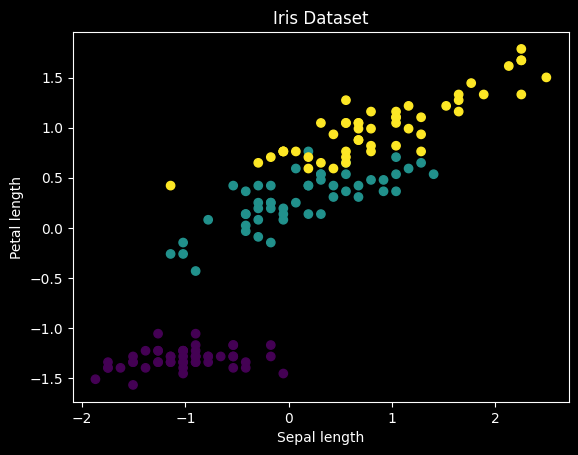

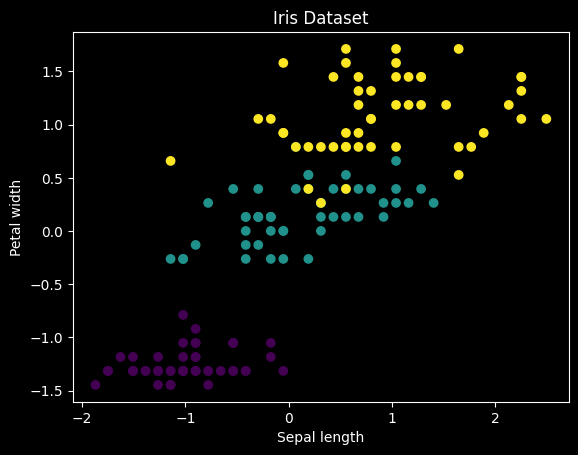

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset')
plt.show()


plt.scatter(X[:, 0], X[:, 2], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Iris Dataset')
plt.show()

plt.scatter(X[:, 0], X[:, 3], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.title('Iris Dataset')
plt.show()

In [7]:
#Softmax function 
def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

In [13]:
def one_hot(y, num_classes):
    Y = np.zeros((y.size, num_classes))
    Y[np.arange(y.size), y] = 1
    return Y

In [14]:
def cross_entropy(Y_true, Y_pred):
    eps = 1e-15
    Y_pred = np.clip(Y_pred, eps, 1 - eps)
    return -np.mean(np.sum(Y_true * np.log(Y_pred), axis=1))


In [15]:
def train_softmax(X, y, lr=0.1, epochs=1000):
    m, d = X.shape
    K = len(np.unique(y))
    
    W = np.zeros((d, K))
    Y = one_hot(y, K)

    for epoch in range(epochs):
        scores = X @ W
        probs = softmax(scores)

        loss = cross_entropy(Y, probs)

        grad = (1 / m) * X.T @ (probs - Y)
        W -= lr * grad

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W


In [16]:
def predict(X, W):
    probs = softmax(X @ W)
    return np.argmax(probs, axis=1)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

W = train_softmax(X, y, lr=0.1, epochs=1000)

y_pred = predict(X, W)
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Epoch 0, Loss: 1.0986
Epoch 100, Loss: 0.3839
Epoch 200, Loss: 0.3535
Epoch 300, Loss: 0.3400
Epoch 400, Loss: 0.3322
Epoch 500, Loss: 0.3272
Epoch 600, Loss: 0.3237
Epoch 700, Loss: 0.3211
Epoch 800, Loss: 0.3190
Epoch 900, Loss: 0.3174
Accuracy: 0.8666666666666667
